Objectif : lire le fichier mp3 des baleines et en faire un spectrogramme par sections.

In [1]:
path_to_sound = '../../content/sounds/20180820_baleines2.mp3'

In [2]:
import pydub 
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

In [3]:
sample_rate, y = read(path_to_sound)

In [4]:
y = y.mean(axis=1)

In [5]:
y.shape

(31783936,)

In [6]:
y

array([ 0.,  0.,  0., ..., -3., 32., 30.])

In [7]:
t = np.arange(y.size) / sample_rate

In [8]:
t / 60

array([0.00000000e+00, 3.47222222e-07, 6.94444444e-07, ...,
       1.10360878e+01, 1.10360882e+01, 1.10360885e+01])

In [11]:
import matplotlib.pyplot as plt

In [12]:
help(plt.specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, *, data=None, **kwargs)
    Plot a spectrogram.
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Parameters
    ----------
    x : 1-D array or sequence
        Array or sequence containing the data.
    
    Fs : scalar
        The sampling frequency (samples per time unit).  It is used
        to calculate the Fourier frequencies, freqs, in cycles per time
        unit. The default value is 2.
    
    window : callable or n

In [13]:
segments = [(24, 46),
            (88, 88+18),
            (6*60+34, 6*60+34 + 20)]

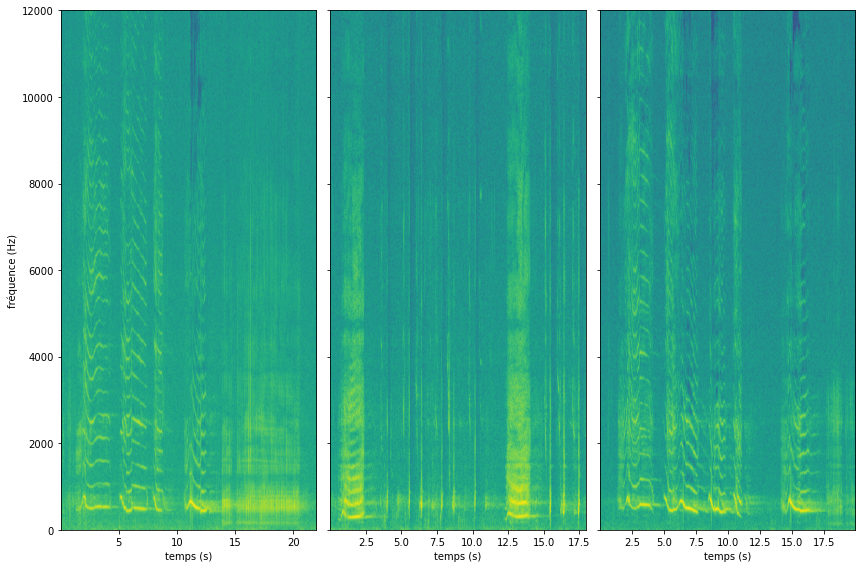

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 8), sharey=True)
for (start, end), axis in zip(segments, ax.ravel()):

    axis.specgram(y[sample_rate * start:sample_rate * end], Fs=sample_rate, scale='dB', NFFT=2048, pad_to=4096, cmap='viridis')
    
    axis.set_ylim((0, 12000))
    axis.set_xlabel('temps (s)')
    
plt.tight_layout(rect=(0.01, 0, 1, 1))
ax[0].set_ylabel('fréquence (Hz)')
plt.savefig('baleines.png', dpi=200)